In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./crop_production.csv')

In [3]:
df

,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...,...
246086,246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [4]:
df.isna().mean()*100

index            0.000000
State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       1.515699
dtype: float64

In [5]:
df.columns

Index(['index', 'State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area', 'Production'],
      dtype='object')

In [6]:
df.dropna(subset=['Production'],inplace=True)

In [7]:
df.drop(columns=['index'], inplace=True)

In [8]:
df.isna().mean()*100

State_Name       0.0
District_Name    0.0
Crop_Year        0.0
Season           0.0
Crop             0.0
Area             0.0
Production       0.0
dtype: float64

### 1. What is the overall trend of crop production in different states of India over the years?

In [9]:
state_year_production = df.groupby(['State_Name', 'Crop_Year'])['Production'].sum().reset_index()


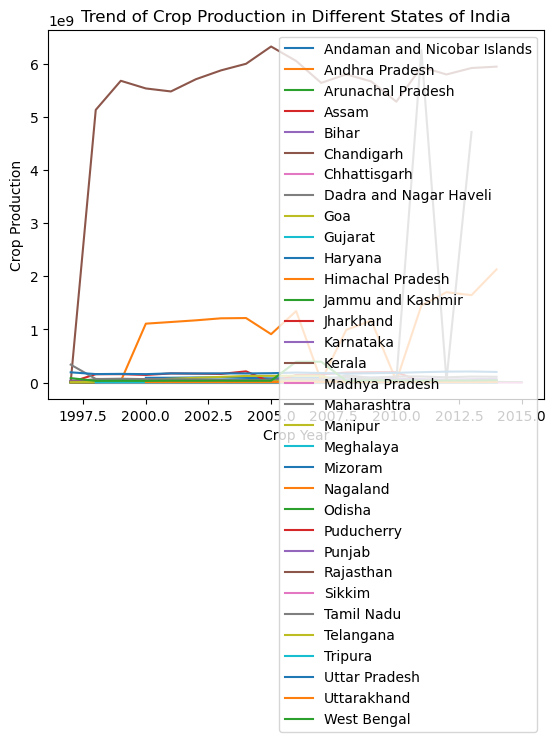

In [10]:
for state in state_year_production['State_Name'].unique():
    state_data = state_year_production[state_year_production['State_Name'] == state]
    
    plt.plot(state_data['Crop_Year'], state_data['Production'], label=state)

plt.xlabel('Crop Year')
plt.ylabel('Crop Production')
plt.title('Trend of Crop Production in Different States of India')

plt.legend()

plt.show()


### 2. Which states have the highest and lowest crop production in the year 2014 year?

In [11]:
year = 2014

yearly_data = df[df['Crop_Year'] == year]

state_production = yearly_data.groupby('State_Name')['Production'].sum().reset_index()

state_production_sorted = state_production.sort_values('Production', ascending=False)

highest_state = state_production_sorted.iloc[0]['State_Name']
highest_production = state_production_sorted.iloc[0]['Production']

lowest_state = state_production_sorted.iloc[-1]['State_Name']
lowest_production = state_production_sorted.iloc[-1]['Production']

print(f"In {year}, the state with the highest crop production was {highest_state} with a production of {highest_production} units.")
print(f"In {year}, the state with the lowest crop production was {lowest_state} with a production of {lowest_production} units.")


In 2014, the state with the highest crop production was Kerala with a production of 5951362646.81 units.
In 2014, the state with the lowest crop production was Dadra and Nagar Haveli with a production of 27941.0 units.


### 3. Which crops are most commonly grown in each state?

In [12]:
state_crop_counts = df.groupby(['State_Name', 'Crop'])['Crop'].count().reset_index(name='Crop_Count')

most_common_crops = state_crop_counts.groupby('State_Name').apply(lambda x: x.nlargest(1, 'Crop_Count')).reset_index(drop=True)

for index, row in most_common_crops.iterrows():
    state = row['State_Name']
    crop = row['Crop']
    count = row['Crop_Count']
    print(f"In {state}, the most commonly grown crop is {crop} with a count of {count}.")



In Andaman and Nicobar Islands, the most commonly grown crop is Cashewnut with a count of 18.
In Andhra Pradesh, the most commonly grown crop is Rice with a count of 481.
In Arunachal Pradesh, the most commonly grown crop is Maize with a count of 273.
In Assam, the most commonly grown crop is Rice with a count of 1356.
In Bihar, the most commonly grown crop is Maize with a count of 1962.
In Chandigarh, the most commonly grown crop is Maize with a count of 13.
In Chhattisgarh, the most commonly grown crop is Moong(Green Gram) with a count of 527.
In Dadra and Nagar Haveli, the most commonly grown crop is Rice with a count of 31.
In Goa, the most commonly grown crop is Rice with a count of 38.
In Gujarat, the most commonly grown crop is Groundnut with a count of 683.
In Haryana, the most commonly grown crop is Wheat with a count of 317.
In Himachal Pradesh, the most commonly grown crop is Potato with a count of 145.
In Jammu and Kashmir , the most commonly grown crop is Maize with a coun

### 4. What is the distribution of crops based on the seasons in different districts?

### 5. Is there any correlation between the area of cultivation and crop production?

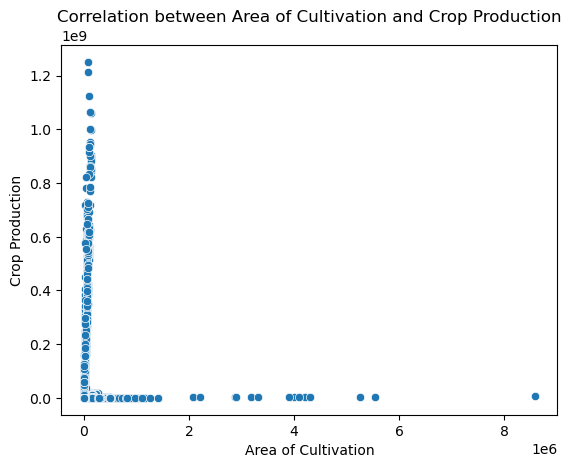

Correlation coefficient: 0.04058747919933999


In [13]:
selected_columns = ['Area', 'Production']

df_selected = df[selected_columns]


correlation = df_selected['Area'].corr(df_selected['Production'])

sns.scatterplot(data=df_selected, x='Area', y='Production')
plt.title('Correlation between Area of Cultivation and Crop Production')
plt.xlabel('Area of Cultivation')
plt.ylabel('Crop Production')
plt.show()
print(f"Correlation coefficient: {correlation}")


### 6. Are there any significant differences in crop production between different districts within the same state?

In [14]:
?????

Object `???` not found.


In [20]:
df.Crop.value_counts().nlargest(15)

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Groundnut             8770
Wheat                 7878
Sugarcane             7827
Rapeseed &Mustard     7533
Arhar/Tur             7476
Gram                  7227
Jowar                 6990
Onion                 6984
Potato                6914
Dry chillies          6421
Name: Crop, dtype: int64

### 7. How has the production of specific crops changed over the years?

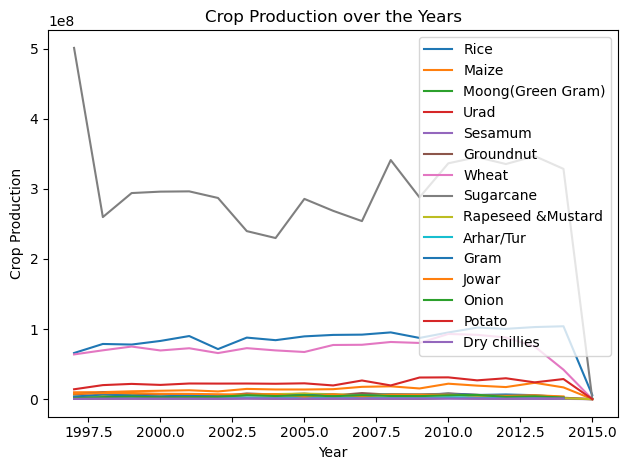

In [21]:
crops_of_interest = ['Rice', 'Maize', 'Moong(Green Gram)','Urad','Sesamum','Groundnut', 'Wheat', 'Sugarcane','Rapeseed &Mustard','Arhar/Tur','Gram', 'Jowar', 'Onion', 'Potato', 'Dry chillies']

crop_data = df[df['Crop'].isin(crops_of_interest)]

crop_production = crop_data.groupby(['Crop_Year', 'Crop'])['Production'].sum().reset_index()

for crop in crops_of_interest:
    crop_subset = crop_production[crop_production['Crop'] == crop]
    
    
    plt.plot(crop_subset['Crop_Year'], crop_subset['Production'], label=crop)


plt.title('Crop Production over the Years')
plt.xlabel('Year')
plt.ylabel('Crop Production')
plt.legend()
plt.tight_layout()
plt.show()

### 8. Are there any specific crops or states that show consistent growth or decline in production?

In [22]:
crop_state_production = df.groupby(['Crop', 'State_Name'])['Production'].mean().reset_index()

consistent_growth_crops = []
consistent_decline_crops = []

for crop in crop_state_production['Crop'].unique():
    crop_data = crop_state_production[crop_state_production['Crop'] == crop]
    production_values = crop_data['Production']
    
    if production_values.is_monotonic_increasing:
        consistent_growth_crops.append(crop)
    elif production_values.is_monotonic_decreasing:
        consistent_decline_crops.append(crop)

consistent_growth_states = []
consistent_decline_states = []

for state in crop_state_production['State_Name'].unique():
    state_data = crop_state_production[crop_state_production['State_Name'] == state]
    production_values = state_data['Production']
    
    if production_values.is_monotonic_increasing:
        consistent_growth_states.append(state)
    elif production_values.is_monotonic_decreasing:
        consistent_decline_states.append(state)

print("Crops with consistent growth in production:")
for crop in consistent_growth_crops:
    print(crop)

print("\nCrops with consistent decline in production:")
for crop in consistent_decline_crops:
    print(crop)

print("\nStates with consistent growth in production:")
for state in consistent_growth_states:
    print(state)

print("\nStates with consistent decline in production:")
for state in consistent_decline_states:
    print(state)


Crops with consistent growth in production:
Apple
Arcanut (Processed)
Ash Gourd
Atcanut (Raw)
Bean
Beet Root
Ber
Cashewnut Processed
Cashewnut Raw
Coffee
Colocosia
Cond-spcs other
Cucumber
Jack Fruit
Jobster
Jute & mesta
Lab-Lab
Lemon
Lentil
Litchi
Other Citrus Fruit
Other Dry Fruit
Peach
Pear
Peas  (vegetable)
Perilla
Plums
Pump Kin
Rajmash Kholar
Ribed Guard
Ricebean (nagadal)
Sapota
Snak Guard
Water Melon
Yam
other fibres

Crops with consistent decline in production:
Blackgram
Drum Stick
Pome Granet
Rubber
Tea
Turnip

States with consistent growth in production:

States with consistent decline in production:


### 10.  Season wise crops?

In [30]:
season_crop_counts = pd.crosstab(df.Season, df.Crop)
season_crop_counts

Crop,Apple,Arcanut (Processed),Arecanut,Arhar/Tur,Ash Gourd,Atcanut (Raw),Bajra,Banana,Barley,Bean,...,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds
Season,,,,,,,,,,,,,,,,,,,,,
Autumn,0,0,0,18,0,0,0,6,0,0,...,6,0,288,0,0,0,0,0,0,0
Kharif,0,0,16,6701,0,0,4630,131,134,20,...,134,0,5856,45,0,3,0,0,29,238
Rabi,0,0,118,444,0,0,262,60,3934,0,...,382,0,1836,13,0,7504,0,0,41,274
Summer,0,0,0,28,0,0,331,190,0,0,...,1,0,1150,0,0,300,0,0,0,0
Whole Year,4,20,1404,254,44,20,156,2739,48,0,...,3643,8,171,0,85,54,36,10,0,82
Winter,0,0,0,31,0,0,0,7,0,0,...,2,0,409,0,0,17,0,0,0,0


### 11. What are the top crops in terms of production quantity and which states contribute the most to their production?

In [31]:
crop_production = df.groupby('Crop')['Production'].sum().reset_index()

sorted_crops = crop_production.sort_values('Production', ascending=False)

top_crops = sorted_crops.head(5)

top_crops_states = {}

for crop in top_crops['Crop']:
    crop_data = df[df['Crop'] == crop]
    state_production = crop_data.groupby('State_Name')['Production'].sum()
    top_state = state_production.idxmax()
    top_crops_states[crop] = top_state

for crop, state in top_crops_states.items():
    print(f"Top Crop: {crop}")
    print(f"Top Producing State: {state}")
    print()


Top Crop: Coconut 
Top Producing State: Kerala

Top Crop: Sugarcane
Top Producing State: Uttar Pradesh

Top Crop: Rice
Top Producing State: West Bengal

Top Crop: Wheat
Top Producing State: Uttar Pradesh

Top Crop: Potato
Top Producing State: Uttar Pradesh

